In [3]:
pip install numpy pandas openpyxl


Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [4]:
pip install seaborn matplotlib

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 23.2.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [5]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 


In [6]:
df = pd.read_excel('ML data.xlsx', engine='openpyxl')
df.head(5) 

,campaign_budget,budget,segments.date,campaign id,campaign name,metrics.ctr,metrics.conversions_value,metrics.cost_micros,cost_in_pounds,metrics.conversions,metrics.clicks,metrics.impressions,metrics.all_conversions_value,metrics.cost_per_conversion,Cost / conv.,metrics.cost_per_all_conversions,Cost / all conv.,metrics.value_per_conversion
0,20000000,20.0,2021-08-06,14181550771,Modern Lights - 06.08.2021,0.028736,0.0,28070000,28.07,0.0,10,348,0.0,NaN,0.000000,1.871333e+06,1.871333,NaN
1,20000000,20.0,2021-08-10,14181550771,Modern Lights - 06.08.2021,0.012959,0.0,8380000,8.38,0.0,6,463,0.0,NaN,0.000000,9.311111e+05,0.931111,NaN
2,10000000,10.0,2021-10-26,14998067020,Sales-Search-Suparna-19_10_2021,0.000000,0.0,0,0.00,0.0,0,1,0.0,NaN,0.000000,NaN,0.000000,NaN
3,10000000,10.0,2022-05-12,17237869098,Shopping Ads,0.002994,0.0,240000,0.24,0.0,1,334,0.0,NaN,0.000000,6.000000e+04,0.060000,NaN
4,10000000,10.0,2022-05-13,17237869098,Shopping Ads,0.009975,0.0,1900000,1.90,9.0,8,802,0.0,211111.111111,0.211111,9.047619e+04,0.090476,0.0


In [7]:
df=df.drop(['campaign_budget','campaign id','campaign name','metrics.cost_micros','metrics.cost_per_conversion','metrics.cost_per_all_conversions'], axis=1)
df.head(3)

,budget,segments.date,metrics.ctr,metrics.conversions_value,cost_in_pounds,metrics.conversions,metrics.clicks,metrics.impressions,metrics.all_conversions_value,Cost / conv.,Cost / all conv.,metrics.value_per_conversion
0,20.0,2021-08-06,0.028736,0.0,28.07,0.0,10,348,0.0,0.0,1.871333,NaN
1,20.0,2021-08-10,0.012959,0.0,8.38,0.0,6,463,0.0,0.0,0.931111,NaN
2,10.0,2021-10-26,0.000000,0.0,0.00,0.0,0,1,0.0,0.0,0.000000,NaN


In [8]:
df.tail(3)

,budget,segments.date,metrics.ctr,metrics.conversions_value,cost_in_pounds,metrics.conversions,metrics.clicks,metrics.impressions,metrics.all_conversions_value,Cost / conv.,Cost / all conv.,metrics.value_per_conversion
7760,5.0,2025-05-24,0.017284,0.0,3.560000,0.0,7,405,0.0,0.0,0.142400,NaN
7761,5.0,2025-05-25,0.006878,0.0,1.142455,0.0,5,727,0.0,0.0,0.103860,NaN
7762,5.0,2025-05-26,0.011858,0.0,2.700000,0.0,9,759,0.0,0.0,0.081818,NaN


In [9]:
df[['metrics.value_per_conversion']] = df[['metrics.value_per_conversion']].fillna(0)

In [10]:
df.tail(3)

,budget,segments.date,metrics.ctr,metrics.conversions_value,cost_in_pounds,metrics.conversions,metrics.clicks,metrics.impressions,metrics.all_conversions_value,Cost / conv.,Cost / all conv.,metrics.value_per_conversion
7760,5.0,2025-05-24,0.017284,0.0,3.560000,0.0,7,405,0.0,0.0,0.142400,0.0
7761,5.0,2025-05-25,0.006878,0.0,1.142455,0.0,5,727,0.0,0.0,0.103860,0.0
7762,5.0,2025-05-26,0.011858,0.0,2.700000,0.0,9,759,0.0,0.0,0.081818,0.0


In [11]:
df.shape 

(7763, 12)

In [12]:
# Save the DataFrame to a new Excel file for download
output_path = 'ML_data_cleaned.xlsx'
df.to_excel(output_path, index=False)
print(f"DataFrame saved to {output_path}")


DataFrame saved to ML_data_cleaned.xlsx


In [13]:
df['segments.date'] = pd.to_datetime(df['segments.date'])
df['month'] = df['segments.date'].dt.month
df['day_of_week'] = df['segments.date'].dt.dayofweek

In [14]:
df['conversion_rate'] = df.apply(lambda row: row['metrics.conversions'] / row['metrics.clicks'] if row['metrics.clicks'] > 0 else 0, axis=1)

In [15]:
df.shape

(7763, 15)

In [16]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
correlation_matrix = df[numeric_cols].corr()

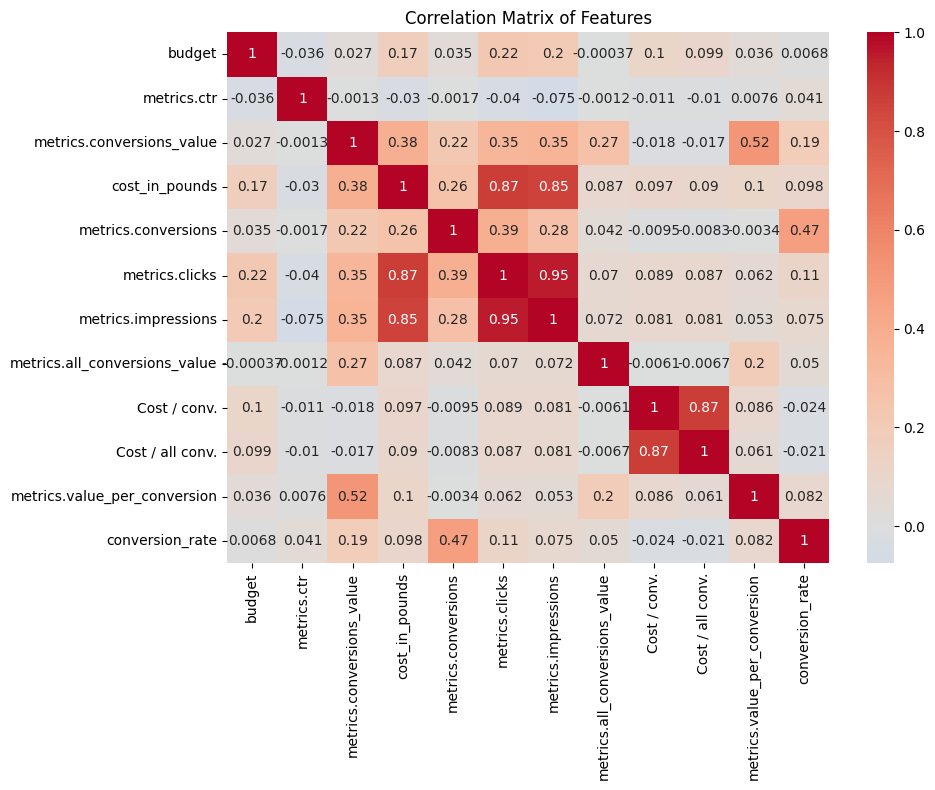

In [17]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix of Features')
plt.tight_layout()
plt.show()

In [18]:
target = 'metrics.conversions'
print(f"Correlations with {target}:")
print(correlation_matrix[target].sort_values(ascending=False)) 

Correlations with metrics.conversions:
metrics.conversions              1.000000
conversion_rate                  0.473823
metrics.clicks                   0.386222
metrics.impressions              0.275707
cost_in_pounds                   0.263975
metrics.conversions_value        0.224823
metrics.all_conversions_value    0.042062
budget                           0.034653
metrics.ctr                     -0.001698
metrics.value_per_conversion    -0.003368
Cost / all conv.                -0.008299
Cost / conv.                    -0.009476
Name: metrics.conversions, dtype: float64


In [19]:
from sklearn.linear_model import LinearRegression
X = df.drop(['metrics.conversions','segments.date','budget','metrics.all_conversions_value','metrics.value_per_conversion','Cost / all conv.','Cost / conv.','month','day_of_week'], axis=1)  
y = df['metrics.conversions']  


In [20]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler 

In [21]:
scaler = MinMaxScaler()
num_col = X.select_dtypes(include=['float64', 'int64']).columns
X_Scaled = scaler.fit_transform(X[num_col])
df  


,budget,segments.date,metrics.ctr,metrics.conversions_value,cost_in_pounds,metrics.conversions,metrics.clicks,metrics.impressions,metrics.all_conversions_value,Cost / conv.,Cost / all conv.,metrics.value_per_conversion,month,day_of_week,conversion_rate
0,20.0,2021-08-06,0.028736,0.0,28.070000,0.0,10,348,0.00,0.000000,1.871333,0.0,8,4,0.000
1,20.0,2021-08-10,0.012959,0.0,8.380000,0.0,6,463,0.00,0.000000,0.931111,0.0,8,1,0.000
2,10.0,2021-10-26,0.000000,0.0,0.000000,0.0,0,1,0.00,0.000000,0.000000,0.0,10,1,0.000
3,10.0,2022-05-12,0.002994,0.0,0.240000,0.0,1,334,0.00,0.000000,0.060000,0.0,5,3,0.000
4,10.0,2022-05-13,0.009975,0.0,1.900000,9.0,8,802,0.00,0.211111,0.090476,0.0,5,4,1.125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7758,5.0,2025-05-09,0.000000,0.0,0.000000,0.0,0,55,0.00,0.000000,0.000000,0.0,5,4,0.000
7759,5.0,2025-05-23,0.008724,0.0,4.710000,0.0,19,2178,10.14,0.000000,0.073594,0.0,5,4,0.000
7760,5.0,2025-05-24,0.017284,0.0,3.560000,0.0,7,405,0.00,0.000000,0.142400,0.0,5,5,0.000
7761,5.0,2025-05-25,0.006878,0.0,1.142455,0.0,5,727,0.00,0.000000,0.103860,0.0,5,6,0.000


LINEAR REGRESSION

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=42)
linmodel = LinearRegression()
linmodel.fit(X_train, y_train)

,fit_intercept,True
,copy_X,True
,tol,1e-06
,n_jobs,None
,positive,False


In [23]:
y_pred = linmodel.predict(X_test)

In [24]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score  
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")


Mean Squared Error (MSE): 447.70055351880507
Mean Absolute Error (MAE): 5.588335069481479
R-squared: 0.5484254671273421


RANDOM FOREST

In [25]:
from sklearn.ensemble import RandomForestRegressor
formodel = RandomForestRegressor(n_estimators=100, random_state=42)
formodel.fit(X_train, y_train)

,n_estimators,100
,criterion,'squared_error'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,1.0
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,bootstrap,True
,oob_score,False


In [26]:
y_pred = formodel.predict(X_test)

In [27]:
from sklearn.model_selection import cross_val_score
scores = cross_val_score(formodel, X , y, cv=5, scoring='r2')
print(f"Cross-validated R²: {scores.mean():.2f} (+/- {scores.std() * 2:.2f})")

Cross-validated R²: 0.82 (+/- 0.38)


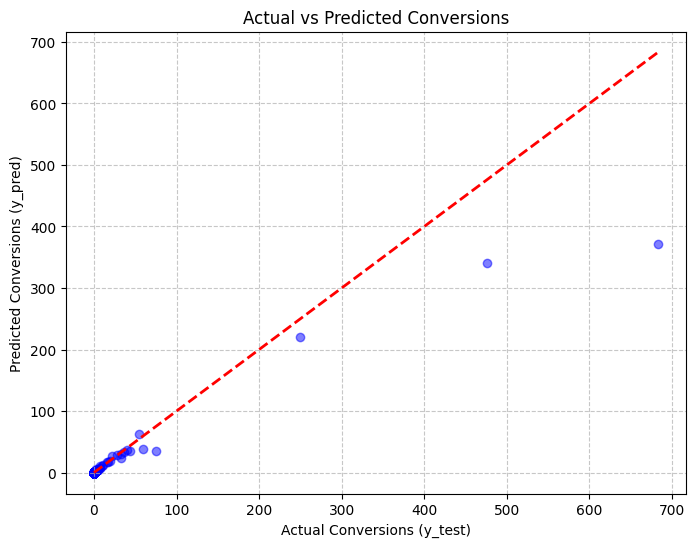

In [28]:
import matplotlib.pyplot as plt

# Assuming you have already trained your model and made predictions
# Replace these with your actual y_test and y_pred from the model
# Example: y_pred = model.predict(X_test)

# Create scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(y_test, y_pred, color='blue', alpha=0.5)  # Plot actual vs predicted
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--', lw=2)  # Ideal 1:1 line
plt.xlabel('Actual Conversions (y_test)')
plt.ylabel('Predicted Conversions (y_pred)')
plt.title('Actual vs Predicted Conversions')
plt.grid(True, linestyle='--', alpha=0.7)   
plt.show()

XGBoost

In [29]:
import xgboost as xgb
xgb_model = xgb.XGBRegressor(n_estimators=100,learning_rate=0.1,max_depth=6,random_state=42)
xgb_model.fit(X_train, y_train)
y_pred = xgb_model.predict(X_test)


In [30]:
mse = mean_squared_error(y_test, y_pred)
mae = mean_absolute_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
cv_scores = cross_val_score(xgb_model, X_Scaled, y, cv=5, scoring='r2')
print(f"XGBoost Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"Cross-validated R²: {cv_scores.mean():} (+/- {cv_scores.std() * 2:})")


XGBoost Model Evaluation Metrics:
Mean Squared Error (MSE): 109.30691109865892
Mean Absolute Error (MAE): 0.6937644401577943
R-squared: 0.8897472497383081
Cross-validated R²: 0.7915903992768849 (+/- 0.44750701672517784)


Gridsearch CV 

In [31]:
from sklearn.model_selection import GridSearchCV
param_grid = {
    'max_depth': [3, 5, 7],
    'learning_rate': [0.01, 0.1, 0.2],
    'n_estimators': [50, 100, 200]
}
grid_search = GridSearchCV(xgb.XGBRegressor(random_state=42), param_grid, cv=5, scoring='r2')
grid_search.fit(X_train, y_train)
print("Best parameters:", grid_search.best_params_)

Best parameters: {'learning_rate': 0.2, 'max_depth': 3, 'n_estimators': 200}


XGBoost with different Parameters

In [32]:
xgb_model_1 = xgb.XGBRegressor(n_estimators=200,learning_rate=0.2,max_depth=3,random_state=42)
xgb_model_1.fit(X_train, y_train)
y_pred_1 = xgb_model_1.predict(X_test)

In [33]:
mse = mean_squared_error(y_test, y_pred_1)
mae = mean_absolute_error(y_test, y_pred_1)
r2 = r2_score(y_test, y_pred_1)
cv_scores = cross_val_score(xgb_model_1, X, y, cv=5, scoring='r2')
print(f"XGBoost Model Evaluation Metrics:")
print(f"Mean Squared Error (MSE): {mse}")
print(f"Mean Absolute Error (MAE): {mae}")
print(f"R-squared: {r2}")
print(f"Cross-validated R²: {cv_scores.mean():} (+/- {cv_scores.std() * 2:})")


XGBoost Model Evaluation Metrics:
Mean Squared Error (MSE): 122.7031927267562
Mean Absolute Error (MAE): 0.9215052934829143
R-squared: 0.8762350492934085
Cross-validated R²: 0.7799952725728488 (+/- 0.3590164679915179)


Saving the model 

In [35]:
import joblib
joblib.dump(xgb_model, 'xgb_model.pkl')

['xgb_model.pkl']

In [36]:
import xgboost as xgb
xgb_model.save_model('xgboost_conversion_model.json')

Features Used For Training

In [50]:

# Display the feature names used for training
print("Features used for training:")
if hasattr(X, 'columns'):
    print(list(X.columns))
else:
    print("X is a numpy array. Feature order matches the columns in your original DataFrame after dropping target and excluded columns.")


Features used for training:
['metrics.ctr', 'metrics.conversions_value', 'cost_in_pounds', 'metrics.clicks', 'metrics.impressions', 'conversion_rate']


Budget Recommendation


In [53]:
# Simulate budgets and recommend
new_clicks = 50  # Hypothetical new value
new_impression = 500 
new_ctr= .02 
new_cost_in_pounds = 30.00
new_conversion_value= 0.35
new_conversion_rate=0.4
budgets_to_test = [10, 15, 20, 25]
best_budget = None
max_conversions = -1

for budget in budgets_to_test: 
    prediction = model.predict([[ new_clicks,new_impression,new_cost_in_pounds,new_conversion_value,new_ctr,new_conversion_rate]])
    if prediction[0] > max_conversions:
        max_conversions = prediction[0]
        best_budget = budget

print(f"Recommended budget: {best_budget} (predicts {max_conversions:.2f} conversions)")


Recommended budget: 10 (predicts 3.33 conversions)
